In [1]:
# 로지스틱 회귀분석

In [5]:
# titanic 데이터를 분할하고, train 데이터로 로지스틱 회귀분석을 만들어보자

In [6]:
import pandas as pd
import numpy as np

In [23]:
df_t = pd.read_csv('data/titanic.csv')

In [24]:
# 로지스틱 회귀분석은 결측치 제거 필요
df_t.info()
df_t['age'] = df_t['age'].fillna(df_t['age'].median())
df_t['embark_town'] = df_t['embark_town'].fillna(df_t['embark_town'].value_counts().index[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [25]:
# 중복된 변수 제거
df_t = df_t.drop(['pclass', 'embarked'], axis = 1)
# 더미변수화
df_t = pd.get_dummies(df_t, columns=['sex', 'class', 'embark_town'])

In [26]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   age                      891 non-null    float64
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   fare                     891 non-null    float64
 5   adult_male               891 non-null    bool   
 6   sex_female               891 non-null    uint8  
 7   sex_male                 891 non-null    uint8  
 8   class_First              891 non-null    uint8  
 9   class_Second             891 non-null    uint8  
 10  class_Third              891 non-null    uint8  
 11  embark_town_Cherbourg    891 non-null    uint8  
 12  embark_town_Queenstown   891 non-null    uint8  
 13  embark_town_Southampton  891 non-null    uint8  
dtypes: bool(1), float64(2), in

In [28]:
df_t['adult_male'].value_counts()
df_t = df_t.astype(float)

In [29]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    float64
 1   age                      891 non-null    float64
 2   sibsp                    891 non-null    float64
 3   parch                    891 non-null    float64
 4   fare                     891 non-null    float64
 5   adult_male               891 non-null    float64
 6   sex_female               891 non-null    float64
 7   sex_male                 891 non-null    float64
 8   class_First              891 non-null    float64
 9   class_Second             891 non-null    float64
 10  class_Third              891 non-null    float64
 11  embark_town_Cherbourg    891 non-null    float64
 12  embark_town_Queenstown   891 non-null    float64
 13  embark_town_Southampton  891 non-null    float64
dtypes: float64(14)
memory usag

In [30]:
df_t['adult_male'].value_counts() # True 1.0 False 0.0

1.0    537
0.0    354
Name: adult_male, dtype: int64

In [31]:
# 설명변수(X), 타겟변수(y) 분리
X = df_t.drop(['survived'], axis = 1)
y = df_t['survived']

In [33]:
# 홀드아웃 기법
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 2020)
# test_size = 0.2 기준으로 1차 분류
# 분류된 내부를 stratify 기준으로 2차 분류

In [46]:
y.value_counts()
# stratify = y
# 0.0 
print(549/(549+342))
# 1.0 
print(342/(549+342))

# X_train, y_train 한쌍
print(len(X_train))
print(len(y_train))

print(712/(712+179))
print(179/(712+179))

# X_test, y_test 한쌍
print(len(X_test))
print(len(y_test))

0.6161616161616161
0.3838383838383838
712
179
0.7991021324354658
0.20089786756453423
712
179


In [48]:
import statsmodels.api as sm
#help(sm.Logit)
model = sm.Logit(y_train, X_train) # 순서 중요
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.409459
         Iterations 7


In [49]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                           10
Date:                Tue, 20 Sep 2022   Pseudo R-squ.:                  0.3849
Time:                        22:59:33   Log-Likelihood:                -291.53
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 2.720e-72
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.0184      0.009     -1.960      0.050      -0.037   -3.62e-06
sibsp                      -0.5172      0.133     -3.875      0.000      -0.779      -0.256


In [50]:
# 성능척도_1 AIC
print("model AIC : ", "{:.5f}".format(result.aic))

model AIC :  605.06963


In [51]:
# coef(회귀계수)는 바로 해석 불가능
# 모델에 대한 단계적 선택법 가능
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index

    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model



'''
단계적 선택법
'''

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = [X.columns[0]]
    Smodel_before = processSubset(X,y,predictors)['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors]
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors]
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [52]:
Stepwise_best_model = Stepwise_model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.664126
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.661913
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662992
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.621623
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.502203
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529373
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530107
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613957
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658206
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.611853
  

In [53]:
Stepwise_best_model.aic

601.1467578209549

In [54]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Tue, 20 Sep 2022   Pseudo R-squ.:                  0.3849
Time:                        23:49:46   Log-Likelihood:                -291.57
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 6.159e-74
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult_male               -3.3122      0.256    -12.929      0.000      -3.814      -2.810
class_First               3.1538      0.501      6.296      0.000       2.172       4.136
class_Second              2.4695      0.391      6.324      0.000       1.704       3.235
sibsp                    -0.5143      0.124     -4.136      0.000      -0.758      -0.271
class_Third               1.3493      0.326      4.134      0.000       0.710       1.989
age                      -0.0186      0.009     -2.090      0.037      -0.036      -0.001
parch                    -0.3526      0.144     -2.451      0.014      -0.635      -0.071
fare                      0.0049      0.003      1.615      0.106      -0.001       0.011
embark_town_Cherbourg     0.4644      0.280      1.659      0.097      -0.084       1.013
=========================================================================================
"""

In [55]:
# 로지스틱 회귀모델로 적합한 회귀계수 확인
# 단계적 선택법
print(Stepwise_best_model.params)

adult_male              -3.312166
class_First              3.153808
class_Second             2.469512
sibsp                   -0.514293
class_Third              1.349336
age                     -0.018594
parch                   -0.352575
fare                     0.004931
embark_town_Cherbourg    0.464423
dtype: float64


In [57]:
np.exp(Stepwise_best_model.params)
# adult_male일 경우 adult_male이 아닌 사람에 비해 생존확율이 97% 감소한다
# class_First일때 class_Second보다 약 2배 이상 증가, class_Third 보다 약 6배증가
# sibsp 1단위 증가할 때 생존확률 40% 감소
# fare 1단위 증가할 때 0.004% 증가

adult_male                0.036437
class_First              23.425090
class_Second             11.816675
sibsp                     0.597923
class_Third               3.854864
age                       0.981578
parch                     0.702876
fare                      1.004943
embark_town_Cherbourg     1.591095
dtype: float64

In [60]:
# 로지스틱 회귀분석 : 분류분석으로 활용하기
Stepwise_best_model.params.index

Index(['adult_male', 'class_First', 'class_Second', 'sibsp', 'class_Third',
       'age', 'parch', 'fare', 'embark_town_Cherbourg'],
      dtype='object')

In [61]:
X_test

,age,sibsp,parch,fare,adult_male,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
560,28.0,0.0,0.0,7.7500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
130,33.0,0.0,0.0,7.8958,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
551,27.0,0.0,0.0,26.0000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
587,60.0,1.0,1.0,79.2000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,43.0,0.0,0.0,6.4500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
113,20.0,1.0,0.0,9.8250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
605,36.0,1.0,0.0,15.5500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
642,2.0,3.0,2.0,27.9000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [62]:
X_test = X_test[Stepwise_best_model.params.index]

In [63]:
y_test

560    0.0
130    0.0
551    0.0
587    1.0
2      1.0
      ... 
818    0.0
113    0.0
605    0.0
642    0.0
206    0.0
Name: survived, Length: 179, dtype: float64

In [64]:
y_pred = Stepwise_best_model.predict(X_test)

In [65]:
y_pred

560    0.079787
130    0.111742
551    0.228554
587    0.216542
2      0.711970
         ...   
818    0.061194
113    0.625184
605    0.044369
642    0.310386
206    0.047699
Length: 179, dtype: float64

In [66]:
# 임계값을 설정해서 예측값을 이진분류로 반환하기
def cut_off(y, threshold):
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<=threshold] = 0
    return(Y.astype(int))

y_pred = cut_off(y_pred, 0.5)  #임계값을 0.5로 설정
y_pred

560    0
130    0
551    0
587    0
2      1
      ..
818    0
113    1
605    0
642    0
206    0
Length: 179, dtype: int64

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [69]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[92 18]
 [21 48]]


In [70]:
print("Acuuracy : ", accuracy_score(y_test, y_pred))
print("Sensitivity(recall) : ", recall_score(y_test, y_pred))
print("precision_score : ", precision_score(y_test, y_pred))
print("f1_score : ", f1_score(y_test, y_pred))

Acuuracy :  0.7821229050279329
Sensitivity(recall) :  0.6956521739130435
precision_score :  0.7272727272727273
f1_score :  0.711111111111111


In [71]:
# 확률로 예측하기
y_pred_proba = Stepwise_best_model.predict(X_test)
y_pred_proba

560    0.079787
130    0.111742
551    0.228554
587    0.216542
2      0.711970
         ...   
818    0.061194
113    0.625184
605    0.044369
642    0.310386
206    0.047699
Length: 179, dtype: float64

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def draw_roc(test_y, pred_y, model_name):
    fpr, tpr, thr = roc_curve(test_y, pred_y)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color = 'darkorange',
            lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(model_name))
    plt.legend(loc='lower right')
    plt.ion()
    plt.tight_layout()
    plt.show()
            
# 임계점을 변경하면서 그린 그래프 y = x 기준으로 가장 높은 좌상점이 가장 이상적인 기준
# 좌상이 높을 수록 ROC_AUC는 높아질 수 밖에 없다.!

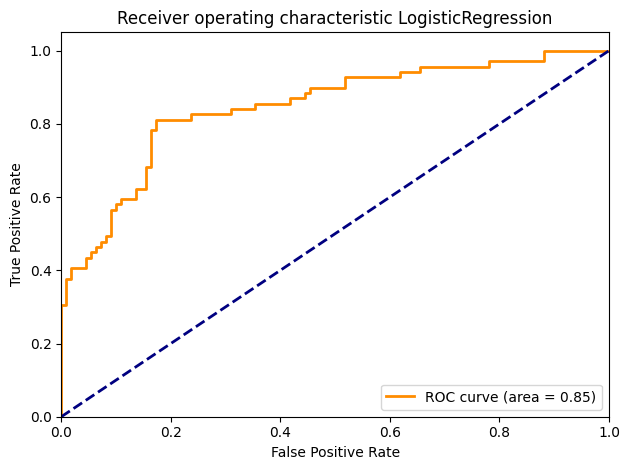

In [74]:
draw_roc(y_test, y_pred_proba, "LogisticRegression")

In [75]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.8469038208168642

In [ ]:
# ROC_CURVE https://hsm-edu.tistory.com/1033